# Montecarlo Approximation of Electron-Matter-Interaction

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
from fastai.vision.all import * 
import fastai
import torch
print("sys.version", sys.version)
print("cuda device name(0)", torch.cuda.get_device_name(0))
print("torch.__version__", torch.__version__)
print("fastai.__version__", fastai.__version__)

sys.version 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
cuda device name(0) Tesla V100S-PCIE-32GB
torch.__version__ 1.7.1
fastai.__version__ 2.5.3


In [3]:
import pathlib
input_path = Path('./data')

def get_x(input_path):
    file_names = get_image_files(input_path)
    file_names = [filename for filename in file_names if "_hf.png" in str( filename ) ]
    return file_names
    
file_names = get_x(input_path)    
print(file_names[0:5])

[Path('data/CoxSpheres_Small_01_230_hf.png'), Path('data/Fibers_01mus_01_140_hf.png'), Path('data/NonOverlappingBalls_01_255_hf.png'), Path('data/NonOverlappingBalls_01_465_hf.png'), Path('data/CoxSpheres_Large_01_20_hf.png')]


## Datensatz laden

In [4]:
def label_function(filename):
    filename_parts = str(filename.stem).split("_")
    y = input_path / Path( "_".join(filename_parts[:-1]) + "_bse.png" )
    return str(y)

for i in range(5):
    print(file_names[i], "=>", label_function(file_names[i]))

data/CoxSpheres_Small_01_230_hf.png => data/CoxSpheres_Small_01_230_bse.png
data/Fibers_01mus_01_140_hf.png => data/Fibers_01mus_01_140_bse.png
data/NonOverlappingBalls_01_255_hf.png => data/NonOverlappingBalls_01_255_bse.png
data/NonOverlappingBalls_01_465_hf.png => data/NonOverlappingBalls_01_465_bse.png
data/CoxSpheres_Large_01_20_hf.png => data/CoxSpheres_Large_01_20_bse.png


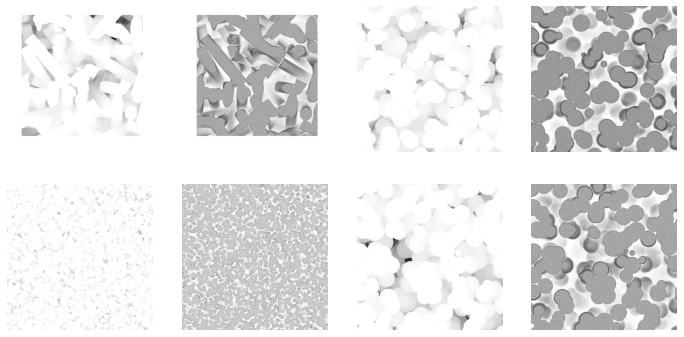

In [5]:
item_transforms  = [RandomCrop((512,512))]

datablocks = DataBlock(blocks=(ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
                       get_items = get_x,
                       get_y = label_function,
                       splitter=RandomSplitter(valid_pct=0.2, seed=42),
                       item_tfms=item_transforms)

data_loader = datablocks.dataloaders(input_path, bs=4, num_workers=0 )

data_loader.show_batch( max_n=4 )

# Netzwerk Architektur

In [6]:
def conv_block( n_in, n_out ):
    return nn.Sequential ( 
        nn.Conv2d(n_in,n_out,3,padding=1), 
        nn.ReLU()
    )

def create_model( nlayer = 6, nfeatures = 32 ):
    layer = [ conv_block(1,nfeatures) ]
    for i in range( nlayer-2):
        layer.append( conv_block(nfeatures,nfeatures) )
    layer.append(conv_block(nfeatures,1))
    model = nn.Sequential ( *layer )
    return model    

## Determine Learning Rate

In [7]:
# learner.save("custom_initial")
# learner.lr_find()

In [8]:
learning_rate=0.001

## Training 

nlayer 16 nfeatues 64 loss l1
model16_64_l1


epoch,train_loss,valid_loss,time
0,0.358121,0.354777,00:19
1,0.357307,0.354777,00:18
2,0.356833,0.354777,00:18
3,0.356715,0.354777,00:18
4,0.356526,0.354777,00:18
5,0.356375,0.354777,00:18
6,0.354232,0.354777,00:18
7,0.354260,0.354777,00:18
8,0.356456,0.354777,00:18
9,0.356746,0.354777,00:18


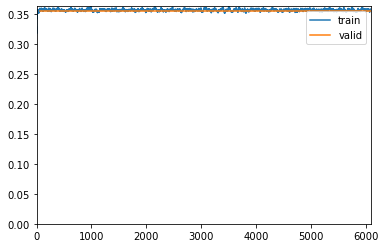

[0.35641348361968994, 0.3547765910625458]
nlayer 16 nfeatues 64 loss l1
model16_64_l1


epoch,train_loss,valid_loss,time
0,0.162937,0.142185,00:18
1,0.154438,0.143951,00:18
2,0.148238,0.143956,00:18
3,0.144589,0.142078,00:18
4,0.133565,0.111797,00:18
5,0.120299,0.108684,00:18
6,0.113823,0.110745,00:18
7,0.111024,0.107204,00:18
8,0.105064,0.099608,00:18
9,0.099901,0.097559,00:18


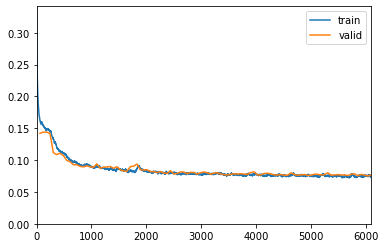

[0.072889544069767, 0.07687108218669891]
nlayer 16 nfeatues 64 loss l1
model16_64_l1


epoch,train_loss,valid_loss,time
0,0.156184,0.143101,00:18
1,0.149183,0.143950,00:18
2,0.148641,0.150842,00:18
3,0.147364,0.151050,00:18
4,0.146967,0.145230,00:18
5,0.147181,0.144587,00:18
6,0.145994,0.142155,00:18
7,0.145354,0.142635,00:18
8,0.146028,0.144406,00:18
9,0.145454,0.143610,00:18


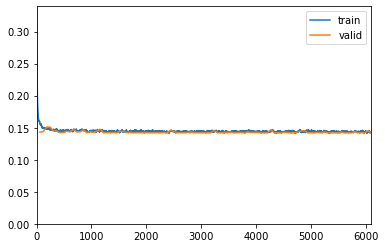

[0.14346401393413544, 0.1419416218996048]
nlayer 16 nfeatues 64 loss l1
model16_64_l1


epoch,train_loss,valid_loss,time
0,0.154833,0.159059,00:18
1,0.130135,0.114804,00:18
2,0.115765,0.104303,00:18
3,0.112900,0.108082,00:18
4,0.107256,0.103516,00:18
5,0.104119,0.106194,00:18
6,0.098279,0.096471,00:18
7,0.096752,0.092423,00:18
8,0.093855,0.094045,00:18
9,0.093399,0.093795,00:18


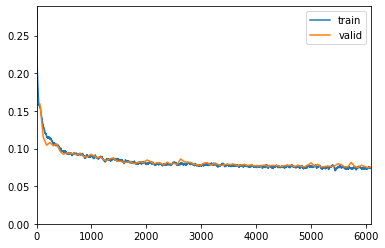

[0.07373324781656265, 0.07585035264492035]
nlayer 16 nfeatues 64 loss l1
model16_64_l1


epoch,train_loss,valid_loss,time
0,0.150251,0.153213,00:18
1,0.126743,0.113481,00:18
2,0.118703,0.109683,00:18
3,0.111552,0.118584,00:18
4,0.116057,0.111920,00:18
5,0.107357,0.108348,00:18
6,0.104044,0.098157,00:18
7,0.098631,0.101866,00:18
8,0.093532,0.093909,00:18
9,0.093041,0.092568,00:18


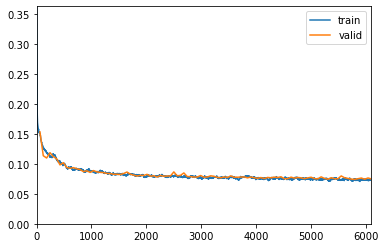

[0.07295103371143341, 0.07476665824651718]
nlayer 16 nfeatues 64 loss l1
model16_64_l1


epoch,train_loss,valid_loss,time
0,0.158957,0.143240,00:18
1,0.151865,0.146186,00:18
2,0.148407,0.137271,00:18
3,0.126885,0.112281,00:18
4,0.115147,0.108459,00:18
5,0.111310,0.108172,00:18
6,0.105440,0.098599,00:18
7,0.103097,0.105544,00:18
8,0.099218,0.100084,00:18
9,0.094959,0.091928,00:18


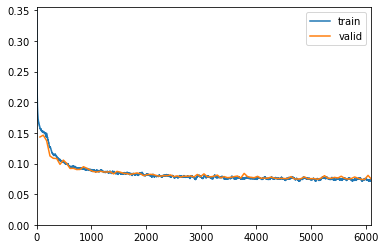

[0.07449576258659363, 0.07438856363296509]
nlayer 16 nfeatues 64 loss l1
model16_64_l1


epoch,train_loss,valid_loss,time
0,0.154428,0.148429,00:18
1,0.149332,0.146303,00:18
2,0.138070,0.119622,00:18
3,0.120298,0.120686,00:18
4,0.112883,0.105132,00:18
5,0.108094,0.100160,00:18
6,0.102994,0.097161,00:18
7,0.097512,0.094512,00:18
8,0.093765,0.093823,00:18
9,0.092806,0.104085,00:18


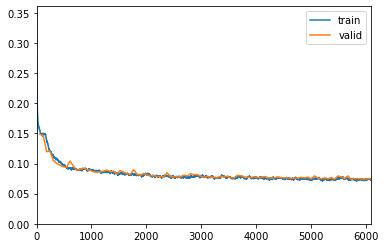

[0.073600172996521, 0.07405905425548553]
nlayer 16 nfeatues 64 loss l1
model16_64_l1


epoch,train_loss,valid_loss,time
0,0.156627,0.144440,00:18
1,0.149912,0.144134,00:18
2,0.147237,0.146159,00:18
3,0.148430,0.154836,00:18
4,0.148130,0.142292,00:18
5,0.145903,0.148997,00:18
6,0.145100,0.142372,00:18
7,0.145924,0.142819,00:18
8,0.144930,0.142674,00:18
9,0.144132,0.142658,00:18


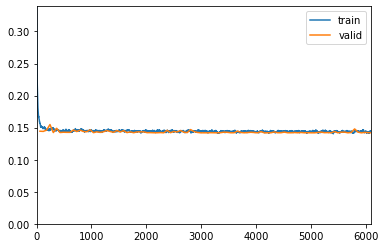

[0.14448626339435577, 0.141940638422966]
nlayer 16 nfeatues 64 loss l1
model16_64_l1


epoch,train_loss,valid_loss,time
0,0.358499,0.354777,00:18
1,0.356519,0.354777,00:18
2,0.356539,0.354777,00:18
3,0.355154,0.354777,00:18
4,0.354116,0.354777,00:18
5,0.355215,0.354777,00:18
6,0.355548,0.354777,00:18
7,0.356162,0.354777,00:18
8,0.355595,0.354777,00:18
9,0.357575,0.354777,00:18


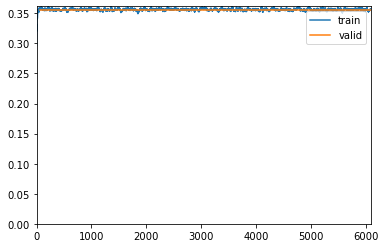

[0.3570842742919922, 0.3547765910625458]
nlayer 16 nfeatues 64 loss l1
model16_64_l1


epoch,train_loss,valid_loss,time
0,0.156197,0.152102,00:18
1,0.147856,0.145991,00:18
2,0.146167,0.143279,00:18
3,0.145262,0.145775,00:18
4,0.147311,0.146957,00:18
5,0.145309,0.148245,00:18
6,0.146741,0.144958,00:18
7,0.145539,0.148618,00:18
8,0.146245,0.142388,00:18
9,0.144894,0.142123,00:18


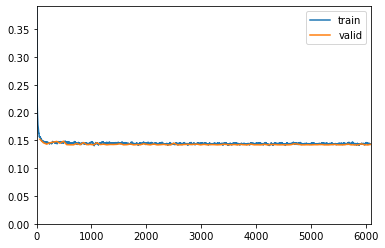

[0.14302918314933777, 0.14325924217700958]
nlayer 4 nfeatues 8 loss l1
model4_8_l1


epoch,train_loss,valid_loss,time
0,0.143065,0.109578,00:03
1,0.116003,0.107032,00:03
2,0.109054,0.112686,00:03
3,0.106429,0.104569,00:03
4,0.105269,0.109823,00:03
5,0.105658,0.107511,00:03
6,0.104327,0.103529,00:03
7,0.103745,0.119940,00:03
8,0.105647,0.103742,00:03
9,0.104941,0.103421,00:03


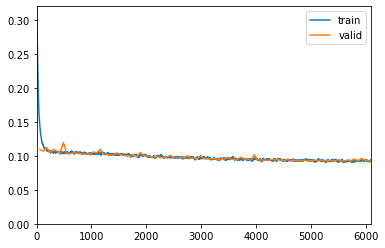

[0.09227471053600311, 0.0922275111079216]
nlayer 4 nfeatues 8 loss l1
model4_8_l1


epoch,train_loss,valid_loss,time
0,0.144682,0.109347,00:03
1,0.115909,0.106831,00:03
2,0.108226,0.105292,00:03
3,0.105511,0.108748,00:03
4,0.105625,0.105998,00:03
5,0.104701,0.103543,00:03
6,0.104698,0.103480,00:03
7,0.103979,0.102904,00:03
8,0.104062,0.102317,00:03
9,0.102334,0.102337,00:03


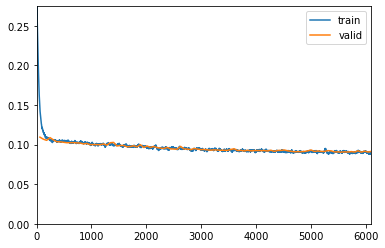

[0.09073301404714584, 0.09146622568368912]
nlayer 4 nfeatues 8 loss l1
model4_8_l1


epoch,train_loss,valid_loss,time
0,0.194302,0.129560,00:03
1,0.126250,0.105459,00:03
2,0.112606,0.105547,00:03
3,0.107509,0.105128,00:03
4,0.106923,0.104395,00:03
5,0.106145,0.104212,00:03
6,0.105135,0.103735,00:03
7,0.104296,0.105046,00:03
8,0.104667,0.103881,00:03
9,0.103889,0.104245,00:03


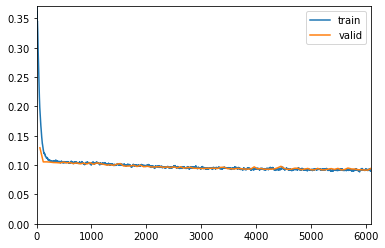

[0.09125396609306335, 0.09488999098539352]
nlayer 4 nfeatues 8 loss l1
model4_8_l1


epoch,train_loss,valid_loss,time
0,0.129264,0.112129,00:03
1,0.113430,0.106782,00:03
2,0.108241,0.106143,00:03
3,0.105675,0.104624,00:03
4,0.105571,0.103728,00:03
5,0.104439,0.104809,00:03
6,0.104169,0.102856,00:03
7,0.104548,0.102716,00:03
8,0.104980,0.102280,00:03
9,0.103092,0.102295,00:03


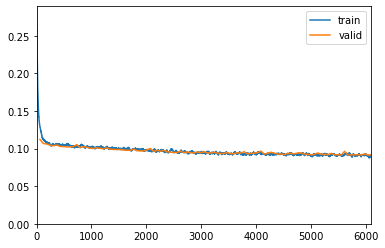

[0.09178454428911209, 0.09191890805959702]
nlayer 4 nfeatues 8 loss l1
model4_8_l1


epoch,train_loss,valid_loss,time
0,0.153280,0.116163,00:03
1,0.120495,0.109240,00:03
2,0.110423,0.106170,00:03
3,0.107942,0.106295,00:03
4,0.107916,0.108248,00:03
5,0.107654,0.104705,00:03
6,0.107333,0.112557,00:03
7,0.105870,0.106817,00:03
8,0.106051,0.103421,00:03
9,0.104894,0.104856,00:03


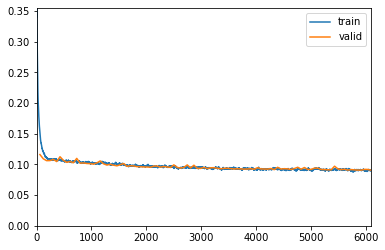

[0.09028332680463791, 0.09044152498245239]
nlayer 4 nfeatues 8 loss l1
model4_8_l1


epoch,train_loss,valid_loss,time
0,0.175399,0.131358,00:03
1,0.127637,0.109313,00:03
2,0.112838,0.108494,00:03
3,0.109457,0.111132,00:03
4,0.106802,0.105325,00:03
5,0.105850,0.106714,00:03
6,0.106279,0.106209,00:03
7,0.105953,0.103865,00:03
8,0.105176,0.103581,00:03
9,0.105219,0.104293,00:03


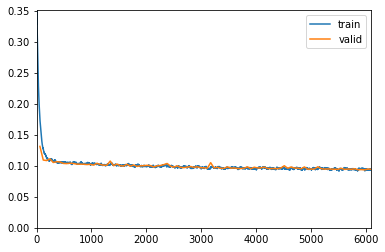

[0.09424668550491333, 0.0943472683429718]
nlayer 4 nfeatues 8 loss l1
model4_8_l1


epoch,train_loss,valid_loss,time
0,0.353998,0.354777,00:03
1,0.356641,0.354777,00:03
2,0.356860,0.354777,00:03
3,0.356052,0.354777,00:03
4,0.356754,0.354777,00:03
5,0.356151,0.354777,00:03
6,0.357280,0.354777,00:03
7,0.354465,0.354777,00:03
8,0.356682,0.354777,00:03
9,0.356696,0.354777,00:03


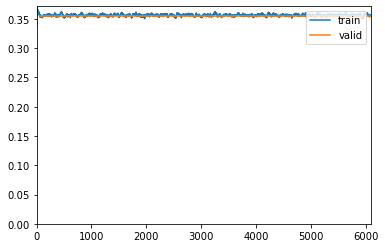

[0.3565818965435028, 0.3547765910625458]
nlayer 4 nfeatues 8 loss l1
model4_8_l1


epoch,train_loss,valid_loss,time
0,0.358274,0.354777,00:03
1,0.356895,0.354777,00:03
2,0.356276,0.354777,00:03
3,0.355318,0.354777,00:03
4,0.356153,0.354777,00:03
5,0.356564,0.354777,00:03
6,0.357575,0.354777,00:03
7,0.357482,0.354777,00:03
8,0.357779,0.354777,00:03
9,0.358714,0.354777,00:03


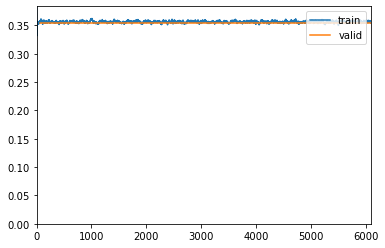

[0.35443416237831116, 0.3547765910625458]
nlayer 4 nfeatues 8 loss l1
model4_8_l1


epoch,train_loss,valid_loss,time
0,0.147012,0.116346,00:03
1,0.117180,0.107371,00:03
2,0.110382,0.105099,00:03
3,0.107880,0.105754,00:03
4,0.107409,0.105941,00:03
5,0.106012,0.105805,00:03
6,0.104864,0.103857,00:03
7,0.104038,0.104032,00:03
8,0.105165,0.108797,00:03
9,0.104372,0.105331,00:03


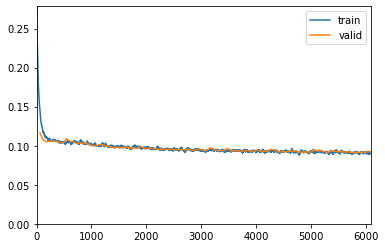

[0.09092621505260468, 0.09132540971040726]
nlayer 4 nfeatues 8 loss l1
model4_8_l1


epoch,train_loss,valid_loss,time
0,0.146183,0.111421,00:03
1,0.115407,0.105251,00:03
2,0.107505,0.103466,00:03
3,0.103761,0.104851,00:03
4,0.103422,0.102457,00:03
5,0.103640,0.104476,00:03
6,0.104377,0.104683,00:03
7,0.104950,0.102092,00:03
8,0.102921,0.101751,00:03
9,0.102221,0.101557,00:03


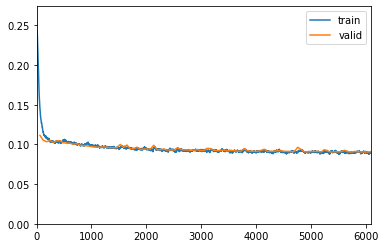

[0.09001243859529495, 0.0910634696483612]


In [10]:
for nlayer, nfeatures, loss, lossname in [ (16,64,L1LossFlat(),"l1"), (4,8,L1LossFlat(),"l1") ]:
    for i in range(10):
        print("nlayer", nlayer, "nfeatues", nfeatures, "loss", lossname)
        fname = "model" + str(nlayer) + "_" + str(nfeatures) + "_" + str(lossname)
        print(fname)
        model = create_model( nlayer, nfeatures )
        learner = Learner( data_loader, model, loss_func=loss )
        learner.fit( 100, lr=learning_rate, cbs=[ShowGraphCallback()] )
        print( learner.recorder.final_record )

In [ ]:
learner.show_results( figsize=(12,10), vmin=0, vmax=64 )